<a href="https://colab.research.google.com/github/adarchenko/test_sandbox/blob/main/FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# media parameters
rho = 18.7
A = 235
Na = 6.022141e24
conc = Na * rho / A
# cross-sections
sigma_t = 7.85e-24
sigma_c = 0.13e-24
sigma_s = 6.47e-24
sigma_f = 1.25e-24
q = 0.1
nu = 2.0
v = 138

In [4]:
alpha = conc * (sigma_s * q + 0.5*sigma_f * nu)
beta  = conc * (sigma_t - sigma_s * (1 - q) - 0.5*sigma_f * nu)


In [5]:
# mesh parameters
R = 10.0
Nx = 600 - 1
h = R / Nx
k = 0.5
tau = h * k / v
T = 1.0
Nt = int(T/tau)
x_grid = np.linspace(0,R,Nx)
t_grid = np.linspace(0,T,Nt)
F = np.zeros([Nx,Nt])
B = np.zeros([Nx,Nt])

In [6]:
def initstate(interval, inits):
  F[interval,0] = inits[0]
  B[interval,0] = inits[1]


In [7]:
def boundary(time_slice):
  F[0,time_slice] = 0
  B[-1,time_slice] = 0

In [8]:
def solver():
  for i in range(Nt-1):
    F[1:,i+1] = F[1:,i] + v*tau * ( - alpha*F[1:,i] + beta*B[1:,i]) - k*(F[1:,i] - F[:-1,i])
    B[:-1,i+1] = B[:-1,i] + v*tau * ( - alpha*B[:-1,i] + beta*F[:-1,i]) - k*(B[:-1,i] - B[1:,i])
    boundary(i+1)


In [14]:
def plotter(x_grid, t_grid, F, B, t_slice):
  fig, ax = plt.subplots(1,2, figsize=(14,7), dpi= 100, facecolor='w', edgecolor='k')
  SMALL_SIZE = 12
  MEDIUM_SIZE = 14
  BIGGER_SIZE = 14
  # font = {'family' : 'normal',
  #        'weight' : 'bold',
  #        'size'   : 22}
  font = {'family': 'Monospace'}
  matplotlib.rc('font', **font)
  plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
  plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
  plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
  plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  # Конец оформления и начало собственно построения графиков
  ###  
  # Using set_dashes() to modify dashing of an existing line
  ax[0].plot(x_grid, F[:,t_slice], color = 'red', linewidth = 2, dashes=[6, 2], label='Forward particles')
  ax[0].plot(x_grid, B[:,t_slice], color = 'blue', linewidth = 2, dashes=[6, 2], label='Backward particles')
  ax[0].plot(x_grid, F[:,t_slice] + B[:,t_slice], color = 'black', linewidth = 2, label='Sum F + B')
  ax[0].set_xlabel('$R, cm$')
  ax[0].set_ylabel('$F, B\ density$')
  ax[0].legend()
  ax[0].grid(True)
  LF = np.diff(F[-1,:])/F[-1,1:]
  LB = np.diff(B[0,:])/B[0,1:]
  ax[1].plot(t_grid[:t_slice], LF[:t_slice], color = 'red', linewidth = 2)
  ax[1].plot(t_grid[:t_slice], LB[:t_slice], color = 'blue', linestyle='dashed', linewidth = 2)
  ax[1].set_xlabel('time')
  ax[1].set_ylabel('$\lambda$')
  ax[1].grid(True)
  ax[1].legend(['$\lambda$ right', '$\lambda$ left'], shadow=True)
  filename = './q2_dump_{0:04d}'.format(t_slice) + '.png'
  plt.savefig(filename, dpi=300)
  ### 
  plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


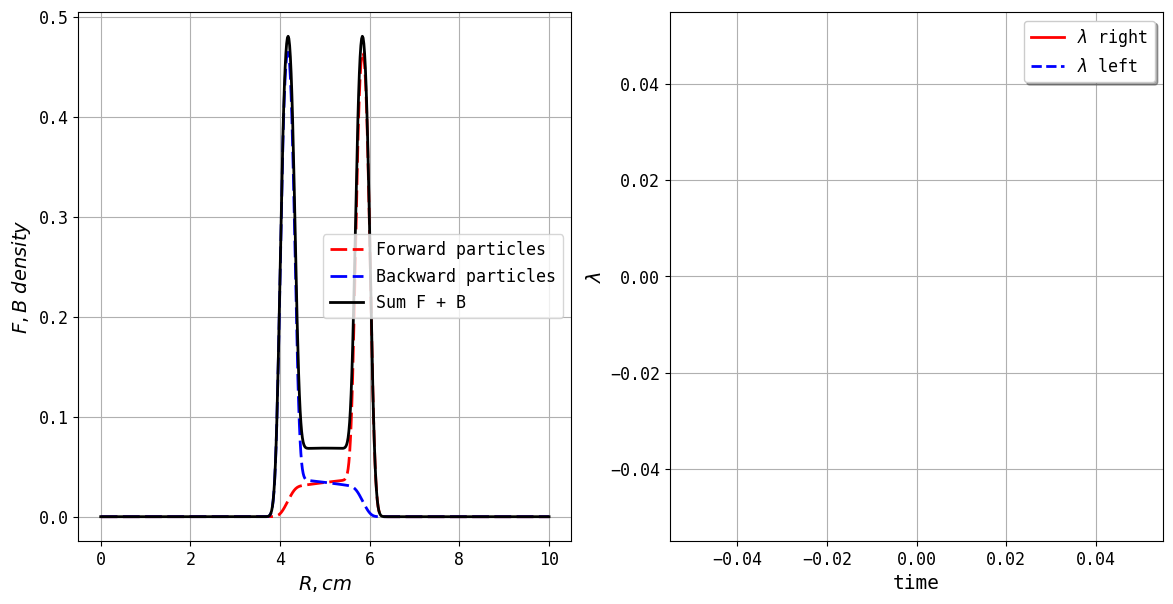

In [16]:
nonzero = list(range(290,310))
initstate(nonzero, [1,1])
boundary(0)
solver()
slices = list(range(0,16000,500))
for s in slices:
  plotter(x_grid, t_grid, F, B, s)

In [19]:
list(range(0,16000,500))

[0,
 500,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500,
 10000,
 10500,
 11000,
 11500,
 12000,
 12500,
 13000,
 13500,
 14000,
 14500,
 15000,
 15500]

In [ ]:
list(range(290,310))

[290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309]

In [ ]:
x[:-1]

[1, 2, 3, 4]

In [ ]:
x[1:]

[2, 3, 4, 5]